## Run the Self-Organizing Map
___

First, load the data

In [1]:
from astropy.io import fits
from astropy.table import Table

import numpy as np

In [2]:
#Load in data produced in primary_targeting_region.ipynb
cut_data_file = '/data2/lsajkov/mpdg/data_products/GAMA/GAMA_primtarg_snr100_lms6_12_25jun2024.fits'

with fits.open(cut_data_file) as cat:
    GAMA_vect_data = Table(cat[1].data)

GAMA_vect_data.add_column(GAMA_vect_data['r_mag_err'], index = 4, name = 'surf_bright_r_err')

In [3]:
#Select the needed data
input_data = GAMA_vect_data['r_mag', 'gr_color', 'surf_bright_r']
input_stds = GAMA_vect_data['r_mag_err', 'gr_color_err', 'surf_bright_r_err']

input_labels = GAMA_vect_data['log_stellar_mass', 'redshift']

tuple_labels = input_labels.as_array()
list_labels = [list(values) for values in tuple_labels]
input_labels = np.array(list_labels)

In [4]:
#Normalize the data to mean 0, unit variance
normalization_params = {}

for variable in input_data.keys():
    normalization_params[variable] = {}

    normalization_params[variable]['mean'] = np.mean(GAMA_vect_data[variable])
    normalization_params[variable]['std']  = np.std(GAMA_vect_data[variable])


normalized_input_data = input_data.copy()
for variable in input_data.keys():
    
    normalized_input_data[variable] -= normalization_params[variable]['mean']
    normalized_input_data[variable] /= normalization_params[variable]['std']

___

Initialize the SOM

In [5]:
from mpdg_som import SelfOrganizingMap

In [6]:
#Set parameters
name = 'mass_profile_dwarf_galaxies' #name of the SOM

mapsize   = [5, 5] #size of the map. pass as a list of dimensions OR as an integer (also pass number of dimensions)
dimension = None

initialization         = 'pca' #random or pca (principal component analysis)
termination            = 'maximum_steps' #when to stop learning. maximum_steps = stop when maximum_steps have elapsed. error_thresh = stop when the error is below this threshold.
learning_rate_function = 'power_law' #which learning rate function to use. currently implemented: power_law
neighborhood_function  = 'gaussian' #which neighborhood function to use. currently implemented: gaussian
error_estimator        = None #which error estimation function to use. currently implemented: max_misalignment

learning_rate = 0.5 #used to adjust the learning rate function
maximum_steps = 5 #used to adjust the learning rate and neighborhood functions
error_thresh  = None #used to stop the SOM if termination = 'error thresh'

In [7]:
#Declare the SOM
SOM = SelfOrganizingMap(
    name                   = name,
    mapsize                = mapsize,
    initialization         = initialization,
    termination            = termination,
    learning_rate_function = learning_rate_function,
    neighborhood_function  = neighborhood_function,
    learning_rate          = learning_rate,
    maximum_steps          = maximum_steps
)

In [8]:
#Load the data & its stds. Check the statistics to make sure it's normalized.
data_cut = 100 #use up to this much of the data
SOM.load_data(normalized_input_data[:data_cut],
              variable_names = ['r_mag', 'gr_color', 'surf_bright_r'])
SOM.load_standard_deviations(input_stds[:data_cut])
SOM.data_statistics()

| Data statistics 
stat	r_mag	gr_color	surf_bright_r	
min	-5.449	-2.165	-2.739	
max	1.767	2.482	3.342	
mean	-0.482	0.302	-0.131	
median	0.038	0.310	-0.031	
std	1.600	1.003	1.260	

In [9]:
#Initialize the SOM
SOM.build_SOM()

In [10]:
np.shape(SOM.mapsize)

(2,)


| SOM. Step 0. Initialization: pca


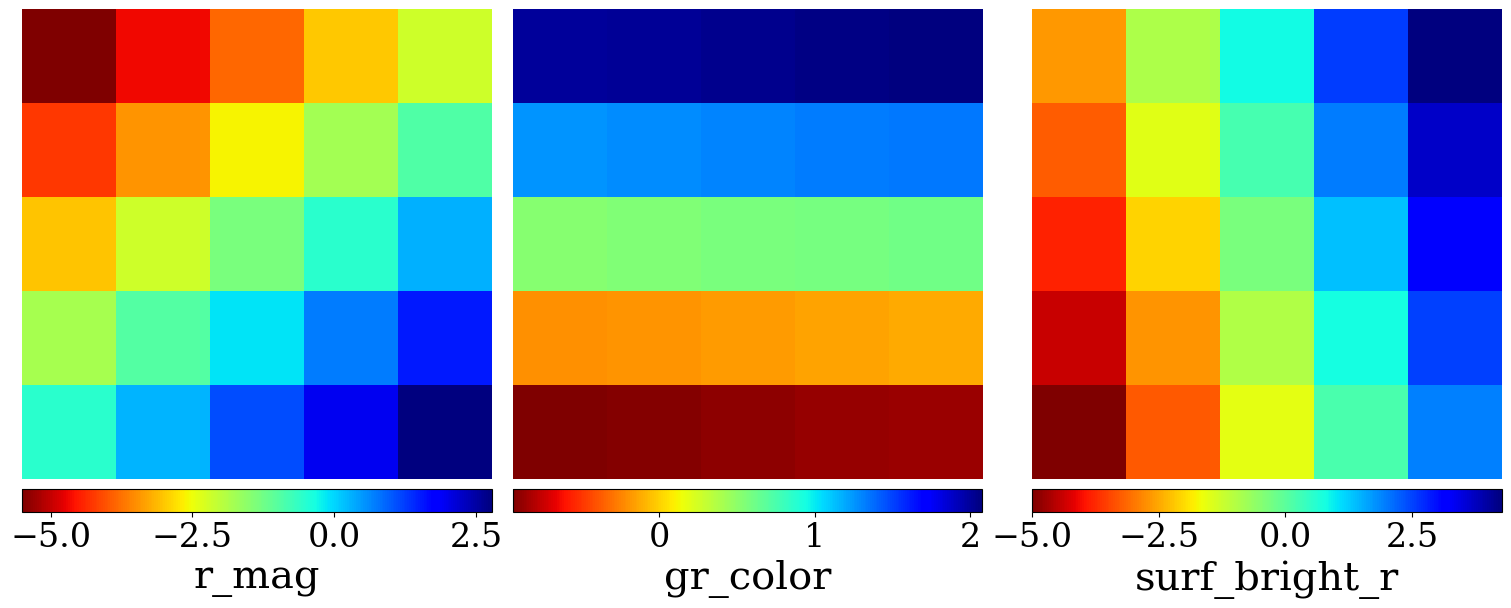

In [11]:
#Visualize SOM before training
SOM.show_map()

In [12]:
SOM.error_thresh

0

In [13]:
#Train the som
SOM.train()

Step 1 complete. Error: 30.580
Step 2 complete. Error: 31.615
Step 3 complete. Error: 30.645
Step 4 complete. Error: 18.630
Step 5 complete. Error: 31.701
SOM converged at step 5 to error 31.70051295417174



| SOM. Step 5. Initialization: pca


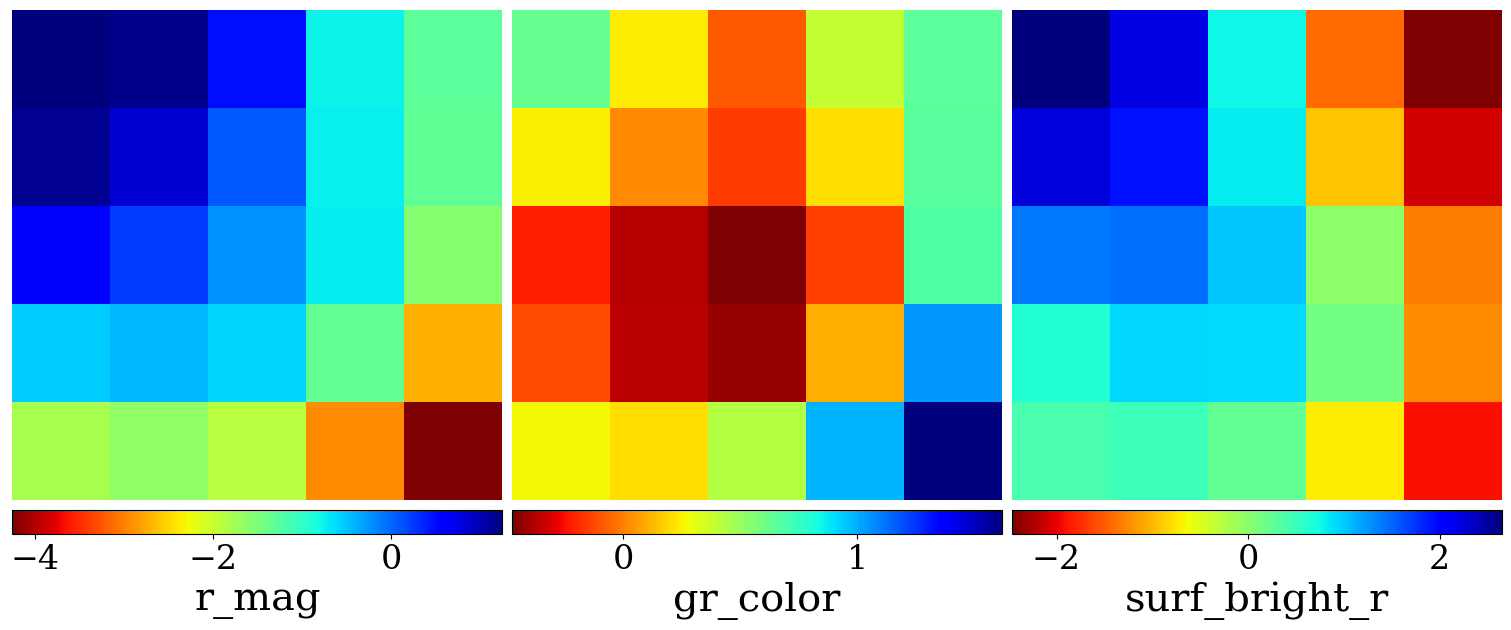

In [14]:
#Visualize the SOM after training
SOM.show_map()


| SOM. Step 5. Initialization: pca


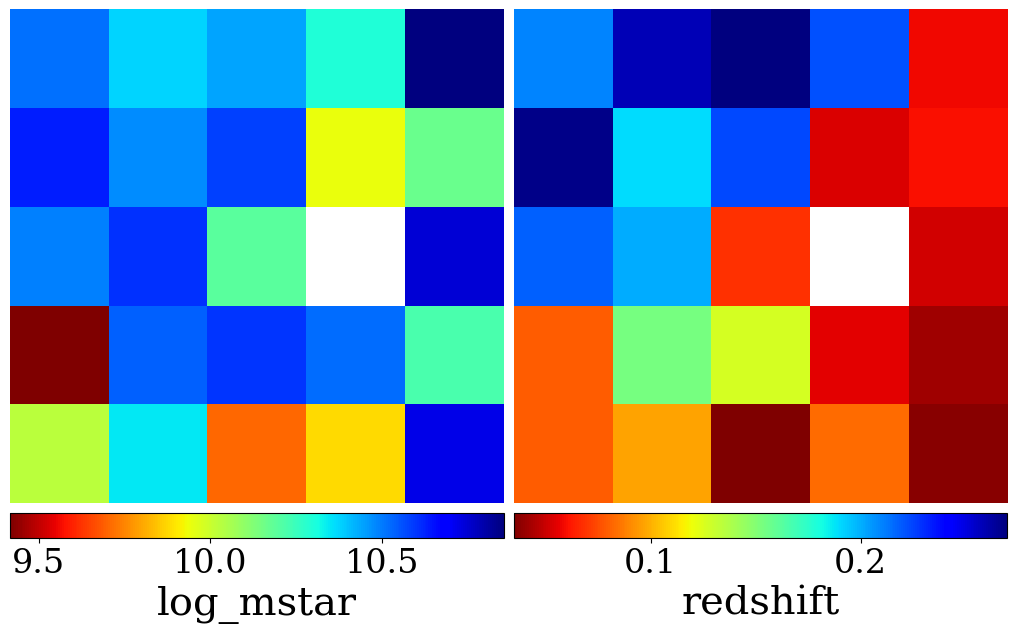

In [15]:
#Label the cells in the map with external parameters. Visualize the labeled map.
SOM.label_map(input_labels[:data_cut],
              parameter_names = ['log_mstar', 'redshift'])
SOM.show_map(show_labeled = True)

In [16]:
SOM.predict(normalized_input_data[:data_cut])

[ 1.0739325   0.40800086 -0.53784657]
(4, 2)
[0.541667   0.05273937 0.3400196 ]
(4, 2)
[-2.0520961   1.7657026   0.14505133]
(0, 2)
[ 0.15355922 -0.81711197  0.6837993 ]
(2, 2)
[0.75269675 0.33185667 0.40741736]
(4, 2)
[-0.82399917  1.2505351   0.25179705]
(1, 3)
[-2.7848005   0.26815343 -2.2044594 ]
(1, 4)
[-2.2535646  0.9962217 -2.738821 ]
(4, 4)
[ 1.4889352  -0.73658144  0.41177022]
(4, 2)
[ 0.11473931 -1.0891737   1.1885812 ]
(2, 2)
[-1.3407067   0.65074754 -2.691217  ]
(4, 4)
[ 0.99571985  0.46806705 -0.5942906 ]
(4, 2)
[-2.259154   1.6046416 -2.3915408]
(4, 4)
[ 0.86733705  0.23682474 -0.5594744 ]
(4, 2)
[ 1.563159  -2.165198   1.1598134]
(2, 0)
[-0.62080455 -0.54823464  0.6084765 ]
(1, 2)
[-0.04135107  0.47065824  0.5212605 ]
(3, 2)
[-0.22675335  0.03199406  0.48247176]
(1, 0)
[0.03365293 0.18239366 0.890549  ]
(3, 2)
[0.87464124 0.34145665 0.927083  ]
(4, 2)
[ 0.04172789 -1.1486623   0.45139334]
(2, 2)
[ 0.6709233   0.28245193 -0.2757087 ]
(4, 2)
[ 0.35836193 -0.38436386 -0.035